In [17]:
import pandas as ps
ds=ps.read_csv("project shets - Buyer_Details_new.csv")
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Buyer_ID        2500 non-null   int64  
 1   Buyer_Name      2478 non-null   object 
 2   Gender          2487 non-null   object 
 3   Age             2493 non-null   float64
 4   Occupation      2476 non-null   object 
 5   Marital_Status  2487 non-null   object 
 6   City            2486 non-null   object 
 7   State           2477 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 156.4+ KB


In [18]:
ds.head()

,Buyer_ID,Buyer_Name,Gender,Age,Occupation,Marital_Status,City,State
0,1,Manish,Female,21.0,Teacher,Single,Mumbai,Delhi
1,2,Sneha,Male,24.0,Doctor,Married,Bangalore,Delhi
2,3,Vikram,Male,52.0,IT Employee,Married,Delhi,Delhi
3,4,Manish,Female,26.0,Doctor,Single,Mumbai,Maharashtra
4,5,Raj,Female,25.0,Business,Married,Mumbai,Tamil Nadu


In [19]:
ds.tail()

,Buyer_ID,Buyer_Name,Gender,Age,Occupation,Marital_Status,City,State
2495,2496,Priya,Male,27.0,Business,Single,Chennai,Karnataka
2496,2497,Sneha,Female,29.0,Teacher,Married,Kolkata,Tamil Nadu
2497,2498,Diya,Male,30.0,IT Employee,Single,Kolkata,Tamil Nadu
2498,2499,Raj,Female,28.0,Student,Single,Bangalore,Delhi
2499,2500,Sneha,Female,36.0,Business,Married,Mumbai,Delhi


In [20]:
ds.describe()

,Buyer_ID,Age
count,2500.00000,2493.000000
mean,1250.50000,38.418773
std,721.83216,11.939501
min,1.00000,18.000000
25%,625.75000,28.000000
50%,1250.50000,38.000000
75%,1875.25000,49.000000
max,2500.00000,59.000000


In [21]:
ds.shape

(2500, 8)

In [22]:
ds.columns

Index(['Buyer_ID', 'Buyer_Name', 'Gender', 'Age', 'Occupation',
       'Marital_Status', 'City', 'State'],
      dtype='object')

In [23]:
ds.isnull().sum()

Buyer_ID           0
Buyer_Name        22
Gender            13
Age                7
Occupation        24
Marital_Status    13
City              14
State             23
dtype: int64

In [24]:
columns=['Gender', 'Age', 'Occupation','Marital_Status', 'City', 'State']

In [25]:
for col in columns:
    if ds[col].dtype.kind in 'ifc': 
        ds[col] = ds[col].fillna(ds[col].median())
    else:
        ds[col] = ds[col].fillna(ds[col].mode()[0] if not ds[col].mode().empty else "Unknown")

In [26]:
ds.isnull().sum()

Buyer_ID           0
Buyer_Name        22
Gender             0
Age                0
Occupation         0
Marital_Status     0
City               0
State              0
dtype: int64

In [27]:
import matplotlib.pyplot as py
import seaborn as sbn

In [28]:
new_col=ds.select_dtypes(include="number").columns

Text(0.5, 1.0, 'Age')

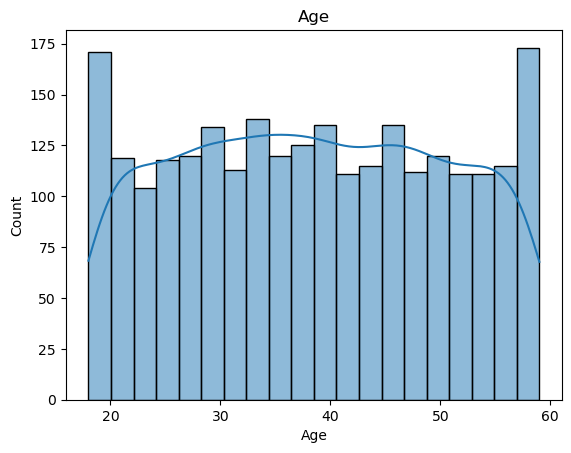

In [29]:
sbn.histplot(ds["Age"],bins=20,kde=True)
py.title("Age")

In [30]:
columns=["Age"]
for col in columns:
    Q1=ds[col].quantile(0.25)
    Q3=ds[col].quantile(0.75)
    IQR=Q3-Q1

    LOWER_BOUND=Q1-1.5*IQR
    UPPER_BOUND=Q3+1.5*IQR
    outliers=ds[(ds[col] < LOWER_BOUND)|(ds[col] > UPPER_BOUND)]
    print(outliers.shape[0])
    

0


In [31]:
ds.to_csv("Pro_Buyer_details(C).csv",index=False)

In [32]:
dcs=ps.read_csv("Pro_Buyer_details(C).csv")